Nombres:
Steven Ma Mei
Daniel Esteban Guzman
Christian Felipe López

# Proyecto Final Analítica de datos 2020-2

El dataset que se va a analizar contiene las estadísticas avanzadas de rendimiento de jugadores de la NBA durante la temporada 2017-2018, así como los salarios de los mismos. Se dispone del diccionario de datos siguiente:

1. Player: nombre del jugador
2. Salary: salario anual (en dolares)
3. NBA_Country: país de procedencia
4. NBA_DraftNumber: número de selección en el draft
5. Age: edad
6. Tm: equipo
7. G: partidos
8. MP: minutos jugados
9. PER: Player Efficiency Rating
10. TS%:True Shooting Percentage (porcentaje real de tiros)
11. 3Par: tasa de intentos de tres puntos
12. FTr: tasa de intentos de tiro libre
13. ORB%: porcentaje de rebotes ofensivos
14. DRB%: porcentaje de rebotes defensivos
15. TRB%: porcentaje de rebotes totales
16. AST%: porcentaje de asistencias
17. STL%: porcentaje de robos
18. BLK%: porcentaje de bloqueos
19. TOV%: porcentaje de pérdidas
20. USG%: porcentaje de uso
21. OWS: Offensive Win Shares (número estimado de victorias contribuidas por un jugador dado su desempeño ofensivo)
22. DWS: Defensive Win Shares (número estimado de victorias contribuidas por un jugador dado su desempeño defensivo)
23. WS: Win Shares (número estimado de victorias contribuidas por un jugador)
24. WS/48: Win Shares per 48 (número estimado de victorias contribuidas por un jugador por 48 minutos)
25. OBPM: Offensive Box Plus/Minus (métrica para medir la contribución de un jugador al equipo mientras está en el juego dado su juego ofensivo)
26. DBPM: Defensive Box Plus/Minus (métrica para medir la contribución de un jugador al equipo mientras está en el juego dado su juego defensivo)
27. BPM: Box Plus/Minus (métrica para medir la contribución de un jugador al equipo mientras está en el juego)
28. VORP: Value Over Replacement Player (métrica para medir la contribución total de un jugador al equipo)

El objetivo del proyecto es predecir los salarios de los jugadores de la NBA a partir de un modelo basado en los campos descritos previamente.

En esta primera entrega aborda:
Limpieza y EDA: Verificar problemas de calidad de los datos

Por lo anterior, se realizará la evaluación de la calidad de los datos y del entendimiento de la relación entre las variables predictivas y la variable objetivo.

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib as mpl
import matplotlib.pyplot as plt #gráficos
import seaborn as sns
pd.set_option('display.max_columns', 500)

# 1. Calidad de los datos (1.0)

Cargamos el dataset del rendimiento de los jugadores de la NBA durante la temporada 2017-2018 y visualizamos los primeros 5 registros.

In [2]:
data = pd.read_csv('2017-18_NBA_salary.csv')
data.head()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


Como podemos ver, cada datapoint tiene 28 características, por lo que, tal vez, debamos que prescindir de algunas. 
A continuación haremos que la columna Salary quede de última, pues es la variable dependiente.

In [3]:
cols = list(data.columns)
a, b = cols.index('Salary'), cols.index('VORP')
cols[b], cols[a] = cols[a], cols[b]
data = data[cols]
data

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
0,Zhou Qi,-0.2,China,43,22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,815615
1,Zaza Pachulia,0.7,Georgia,42,33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,3477600
2,Zach Randolph,0.0,USA,19,36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,12307692
3,Zach LaVine,-0.1,USA,13,22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,3202217
4,Zach Collins,-0.2,USA,10,20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,3057240
5,Yogi Ferrell,0.6,USA,62,24,DAL,79,2238,11.5,0.543,0.489,0.141,1.3,11.3,6.1,13.3,1.4,0.3,9.1,17.0,1.6,1.6,3.1,0.067,-0.4,-0.5,-0.9,1312611
6,Xavier Silas,0.0,USA,62,30,BOS,2,7,-4.9,0.000,0.667,0.000,15.9,15.4,15.7,0.0,7.2,0.0,0.0,19.2,-0.1,0.0,0.0,-0.251,-12.6,-0.7,-13.3,74159
7,Xavier Rathan-Mayes,-0.3,Canada,62,23,MEM,5,118,0.9,0.315,0.333,0.214,0.0,5.0,2.5,23.2,2.6,2.4,19.3,21.7,-0.5,0.1,-0.4,-0.169,-8.7,-1.9,-10.6,46080
8,Wilson Chandler,0.5,USA,23,30,DEN,70,2200,11.1,0.543,0.390,0.186,5.0,14.0,9.5,9.7,0.9,1.4,12.0,14.6,2.0,1.0,3.1,0.067,-0.4,-0.6,-1.0,12016854
9,Willy Hernangomez,0.3,Spain,35,23,TOT,45,430,20.6,0.592,0.075,0.555,13.6,25.2,19.3,11.0,1.8,2.8,15.4,21.7,0.8,0.6,1.4,0.156,-0.1,0.6,0.5,1435750


### Exploración de los datos

Miremos cuales son los tipos de las caracteristicas de cada datapoint

In [4]:
data.dtypes

Player              object
VORP               float64
NBA_Country         object
NBA_DraftNumber      int64
Age                  int64
Tm                  object
G                    int64
MP                   int64
PER                float64
TS%                float64
3PAr               float64
FTr                float64
ORB%               float64
DRB%               float64
TRB%               float64
AST%               float64
STL%               float64
BLK%               float64
TOV%               float64
USG%               float64
OWS                float64
DWS                float64
WS                 float64
WS/48              float64
OBPM               float64
DBPM               float64
BPM                float64
Salary               int64
dtype: object

Como podemos observar, el salario aparece como un valor entero. Sin embargo, esto podría traernos problemas futuros, por lo que se cambiará a tipo float

In [5]:
data ['Salary'] = data['Salary'].astype(float)
data

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
0,Zhou Qi,-0.2,China,43,22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,815615.0
1,Zaza Pachulia,0.7,Georgia,42,33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,3477600.0
2,Zach Randolph,0.0,USA,19,36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,12307692.0
3,Zach LaVine,-0.1,USA,13,22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,3202217.0
4,Zach Collins,-0.2,USA,10,20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,3057240.0
5,Yogi Ferrell,0.6,USA,62,24,DAL,79,2238,11.5,0.543,0.489,0.141,1.3,11.3,6.1,13.3,1.4,0.3,9.1,17.0,1.6,1.6,3.1,0.067,-0.4,-0.5,-0.9,1312611.0
6,Xavier Silas,0.0,USA,62,30,BOS,2,7,-4.9,0.000,0.667,0.000,15.9,15.4,15.7,0.0,7.2,0.0,0.0,19.2,-0.1,0.0,0.0,-0.251,-12.6,-0.7,-13.3,74159.0
7,Xavier Rathan-Mayes,-0.3,Canada,62,23,MEM,5,118,0.9,0.315,0.333,0.214,0.0,5.0,2.5,23.2,2.6,2.4,19.3,21.7,-0.5,0.1,-0.4,-0.169,-8.7,-1.9,-10.6,46080.0
8,Wilson Chandler,0.5,USA,23,30,DEN,70,2200,11.1,0.543,0.390,0.186,5.0,14.0,9.5,9.7,0.9,1.4,12.0,14.6,2.0,1.0,3.1,0.067,-0.4,-0.6,-1.0,12016854.0
9,Willy Hernangomez,0.3,Spain,35,23,TOT,45,430,20.6,0.592,0.075,0.555,13.6,25.2,19.3,11.0,1.8,2.8,15.4,21.7,0.8,0.6,1.4,0.156,-0.1,0.6,0.5,1435750.0


A continuación miraremos la información general del dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 28 columns):
Player             485 non-null object
VORP               485 non-null float64
NBA_Country        485 non-null object
NBA_DraftNumber    485 non-null int64
Age                485 non-null int64
Tm                 485 non-null object
G                  485 non-null int64
MP                 485 non-null int64
PER                485 non-null float64
TS%                483 non-null float64
3PAr               483 non-null float64
FTr                483 non-null float64
ORB%               485 non-null float64
DRB%               485 non-null float64
TRB%               485 non-null float64
AST%               485 non-null float64
STL%               485 non-null float64
BLK%               485 non-null float64
TOV%               483 non-null float64
USG%               485 non-null float64
OWS                485 non-null float64
DWS                485 non-null float64
WS                 485 non

Como se puede ver contamos con 485 datapoints. Sin embargo, podemos ver que las columnas TS% 3PAr, FTr, TOV% tienen algunos valores nulos.

Ahora procedemos a realizar una descripción completa de los datos

In [7]:
data.describe(include="all")

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
count,485,485.000000,485,485.000000,485.000000,485,485.000000,485.000000,485.000000,483.000000,483.000000,483.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,483.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,4.850000e+02
unique,483,NaN,44,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Kay Felder,NaN,USA,NaN,NaN,TOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,374,NaN,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.598763,NaN,29.451546,26.263918,NaN,50.167010,1154.142268,13.260825,0.535387,0.337383,0.263404,4.873814,14.950722,9.908247,12.947835,1.529485,1.713196,13.140373,18.897320,1.275464,1.176495,2.455258,0.079959,-1.270722,-0.489485,-1.760206,6.636507e+06
std,NaN,1.245653,NaN,21.125760,4.272297,NaN,24.874872,811.357419,8.769280,0.112352,0.226894,0.294578,4.582810,6.847530,4.956436,9.112408,0.989562,1.683792,6.115290,5.940536,1.881444,1.034580,2.673670,0.162992,5.026275,2.389343,5.661447,7.392602e+06
min,NaN,-1.300000,NaN,1.000000,19.000000,NaN,1.000000,1.000000,-41.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.300000,0.000000,-1.200000,-1.063000,-36.500000,-14.300000,-49.200000,4.608000e+04
25%,NaN,-0.100000,NaN,11.000000,23.000000,NaN,29.000000,381.000000,9.800000,0.505500,0.167000,0.155000,1.800000,10.200000,6.200000,6.900000,1.000000,0.600000,9.900000,15.000000,0.000000,0.300000,0.300000,0.040000,-2.700000,-1.700000,-3.600000,1.471382e+06
50%,NaN,0.100000,NaN,25.000000,26.000000,NaN,59.000000,1134.000000,13.200000,0.545000,0.346000,0.231000,3.200000,14.000000,8.700000,9.900000,1.500000,1.200000,12.500000,17.900000,0.800000,1.000000,1.800000,0.083000,-1.100000,-0.400000,-1.300000,3.202217e+06
75%,NaN,0.900000,NaN,47.000000,29.000000,NaN,71.000000,1819.000000,16.500000,0.582500,0.481000,0.319500,7.000000,18.800000,13.300000,17.600000,1.900000,2.200000,15.750000,22.200000,2.000000,1.800000,3.600000,0.123000,0.400000,1.000000,0.500000,1.000000e+07


### Información relevante respecto a cada característica:
#### VORP
El VORP (Value Over Replacement Player) es una estadística que demuestra cuanto contribuye un jugador a su equipo en comparación con un jugador de nivel de reemplazo. Por ejemplo, un jugador con un VORP de 4.0 "debería" cobrar el doble de un jugador con un VORP de 2.0.
En este caso, se puede ver que el valor mínimo de esta variable es negativo, es decir, hay jugadores que en lugar de ayudar a su equipo, lo perjudican, o bueno, esa es la interpretación de la información.

Por otro lado, el valor máximo de VORP es 8.6 y vemos que la media es 0.5, lo que sugiere que ese 8.6 es por alguien excepcional. Además, se puede ver que el percentil 75% no pasa de 0.9, lo que sugiere que hay una distribución sesgada y/o datos atípicos

#### NBA Country
Esta variable describe el país de procedencia de los jugadores que participaron en la NBA durante la temporada 2017-2018. En este caso se puede observar que en esta temporada USA tuvo 374 jugadores de 385.. 

#### NBA DraftNumber

Esta variable el número del sorteo mediante el cual los  equipos eligen a los jugadores menores de 23 años procedentes de las universidades de norteamérica o de las ligas de otros países. Es una medida para igualar la liga, si un equipo queda de último en la clasificación una temporada, en el próximo draft ese equipo tiene muchas papeletas para elegir a los mejores jugadores jovenes.
Algo a tener en cuenta, es que a pesar de que el draft se realiza para los jugadores menores de 23 años, hay varios que superan este umbral y tienen draftnumber.

#### Age
Esta variable representa la edad de cada jugador. Como se puede observar el jugador más joven tiene 19 años, mientras el mayor tiene 41 años. Por otro lado, la media de los jugadores que participaron en la temporada de análisis es un poco más de 26 años.

#### TM
Esta variable es el nombre del equipo en que participó un determinado jugador. En esta temporada participaron 31 equipos, y el equipo con mayor número de rotaciones de jugadores fue TOT con 55. Este puede considerado un valor atípico debido a un equipo no tiende a tener tal número de rotaciones en una sola temporada.
Por otro lado, en algunos registros se podrá notar que un mismo jugador llegó a participar en más de un equipo esa temporada, lo que indica que realmente participaron 483 jugadores.

#### G
Esta variable representa el número de juegos en los que participó un jugador. Se puede observar que la media es 50 y el mínimo de encuentros disputados por un jugador 1, mientras el máximo es 79 partidos. Esto sugiere que el mínimo podría ser un valor atípico, dado que el percentil 25 llega hasta 29, lo que indica que no hay muchos jugadores que jueguen pocos partidos.

#### MP
Esta variable representa el total de minutos jugados por cada jugador. Se puede observar que el mínimo es de 1 minuto y el máximo es de 2898, mientras la media es de 1154 minutos. Lo anterior sugiere que muy pocos jugadores llegan a jugar poco. De igual modo, no muchos jugadores llegan a jugar 2898 minutos o un valor cercano. Aquí podría decirse que 2898 y 1 son valores atípicos. Más adelante entraremos en detalle.
En este caso se optó por consultar la base de datos de la NBA de la temporada 2019-2 para corroborar que fuera posible que un jugador llegara a jugar solo un minuto en toda una temporada, y confirmamos que así era. De igual monit, notamos que es posible que algunos jugadores alcancen un número elevado de minutos, por lo que en primara instancia podríamos decir que los datos son consistentes.

#### PER
El PER (Player Efficiency Rating) es una estadística que mide el rendimiento de un jugador por minuto jugado, pretende combinar todas las contribuciones de un jugador en un solo número.
Aquí se puede ver que existe un sesgo y que hay datos atípicos. Se ve que el valor mínimo es -41.1, mientras el máximo es de 134. Este último valor puede ser atípico, pues el percentil 75% apenas llega a 16. Esta información contrasta con el VORP.
Aquí también se optó por validar estos valores con temporadas pasadas de la NBA, y si bien es cierto que toma valores negativos, no se acercan en lo más mínimo a -41.1, por lo que, en primera instancia, se puede considerar este valor como atípico.

#### TS%
El TS& (True Shooting percentage) es la medida de la eficiencia de los tiros de un jugador, contando tiros de campo, tiros de 3 puntos y tiros libres. Aquí hay algo curioso, hay un máximo de 1.5%, pero según los percentiles y la media los valores comunes datan mayoritariamente en 0.5%. Esto sugiere que probablemente el 1.5% sea un valor atípico.
Mirando la información de las temporadas pasadas de la NBA, esta variable se apróxima a 1, pero nunca lo supera, por lo que hay otro punto pensado en que puede ser atípico.

#### Variables procentuales ORB% DRB% TRB% AST%	STL% BLK% TOV% USG%

En las variables ORB, STL, BLK, TOV y USG hay valores que podrían pasar como atípicos, pues se alejan mucho de los percentiles. 

#### FTr

Tasa de intentos de tiros libres. En estos datos podemos ver que el valor máximo 5.333 pareciera ser atípico al considerarse con la media y los percentiles.

#### 3PAr

Tasa de intento de tiros de tres puntos. Estos datos están bien, lo único a observar son los varios valores de 1.0 (esto indíca que el jugador acertó todos los tiros de 3 puntos que hizo en la temporada), pues en comparación con bases de datos oficiales lo máximo que alcanzan los jugadores de 2019-20 en esta característica es 0.882.

#### BPM
BPM (Box Plus/Minus) utiliza la información de la puntuación del cuadro de un jugador, la posición y el rendimiento general del equipo para estimar la contribución del jugador en puntos por encima del promedio de la liga por cada 100 posesiones jugadas. BPM no tiene en cuenta el tiempo de juego, es puramente una estadística de velocidad.

Podemos ver que la mayoría de los jugadores tienen una contribución baja, pues la media se sitúa en -1.760206. Tiene sentido que la media ronde el cero, pues podemos ver en los percentiles y en el valor mínimo y máximo la distancia entre los datos.
No obstante, puede que este valor mínimo sea atípico, dado que en el percentil 25 se encuentran los valores hasta -3. De igual modo, el valor máximo puede ser atípido dado que hasta el percentil 75 se encuentran los valores hasta 0.5.
Al compararlo con la información de la temporada 2019-20 vamos corroborando este hecho, sin embargo, aún se debe validar esta información.

#### DBPM
Defensive Box Plus/Minus, igual que BPM, pero en el juego defensivo del jugador. En el DBPM podemos ver cierta homogeneidad en los datos, pues no se alejan tanto entre sí. 

#### OBPM
Defensive Box Plus/Minus, igual que BPM, pero en el juego ofensivo del jugador. En el OBPM podemos ver una semejanza en los datos respecto a BPM. La mayoría de los jugadores tienen una contribución baja, pues la media se sitúa por debajo de cero. Tiene sentido que la media ronde el cero, pues podemos ver en los percentiles y en el valor mínimo y máximo la distancia entre los datos.

#### WS/48	
Número estimado de victorias contribuidas por un jugador por 48 minutos. Aquí también podemos ver que existe poca distancia entre los datos, la media es 0.079959, lo cual quiere decir que en promedio un jugador contribuye 0.079959 victorias por cada 48 minutos.

#### WS
Número estimado de victorias contribuidas por un jugador. Aquí podemos ver que en promedio los jugadores aportar 2.455258, lo cual es algo bueno, pues quiero decir la mayoría aporta a la victoria. Los datos están cerca entré sí y tienden a ser positivos. 

#### DWS
Número estimado de victorias contribuidas por un jugador dado su desempeño defensivo. Aquí vemos datos meramente positivos y no muy alejados entre sí. El valor máximo pareciera ser un valor atípico, pues se aleja mucho de los percentiles y la media.

#### OWS
Número estimado de victorias contribuidas por un jugador dado su desempeño ofensivo. También se observa una media positiva, sin embargo, el valor valor máximo podría ser un dato atípico, pues se aleja bastante de los percentiles y la media.

#### Salary
Esta variable representa el salario anual en dolares de cada jugador. Comparando el valor mínimo con el máximo, se nota una diferencia aproximada por un factor de 10 * x donde x<10. Sin embargo, no parece haber una distribución muy mala.

### Aspectos generales:
- Contamos con 485 registros
- En algunos registros contamos con características vacías
- La variable dependiente es el Salary
- Las escalas de los datos varían mucho, por lo que en un futuro tal vez sea necesario hacer una normalización
- Hay datos atípicos. Sin embargo, en un principio no deberíamos descartarlos sin más, puesto que esos datos atípicos no son atípicos sin ninguna razón, pues en la realidad se dan. Así pues, estos datos pueden ser muy importantes para el análisis deseado y eliminarlos podría hacer que el modelo no tenga en cuenta la influencia de los datos atípicos en los salarios. En otras palabras, los datos de jugadores extraordinarios (aunque pocos) deberían tenerse en cuenta, porque permitiría estimar el salario de estos con mayor precisión. Sin embargo, hay que ver más adelante cómo se comporta el modelo, ya que estos datos atípicos pueden tener una mala influencia en la estimación de salarios de jugadores "comunes" o viceversa, por tal, podría ser mejor hacer modelos diferentes según el tipo de jugador.

# 2. Visualización de los datos (2.0)

Ahora se procederá a graficar las caracteristicas del dataset.

## Distribución de la edad de los jugadores

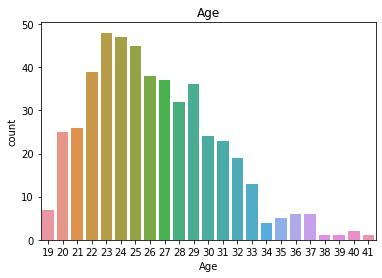

In [8]:
fig, ax = plt.subplots()
sns.countplot(x=data.columns[4], data=data)
plt.title(data.columns[4])

plt.show()

Se puede observar que la mayoría de jugadores está entre los 20 a 30 años. Esto es muy importante tenerlo en cuenta, puesto que por ejemplo, si se quiere estimar el salario de un jugador con edad entre 38 y 41 años, se debe tener en cuenta que no se dispone de mucha información en la categoría descrita, por lo que la estimación puede no ser confiable. Además, se puede sugerir que un modelo basado en la edad no podría ser tan confiable. Sin embargo, se hace la salvedad de que la edad sí puede influir en el salario, pero más adelante se harán pruebas para valorar esta caracteristica.

## Distribución del país de procedencia de los jugadores.

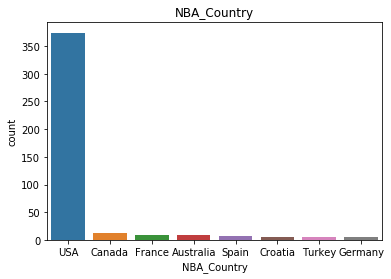

In [9]:
fig, ax = plt.subplots()
sns.countplot(x=data.columns[2], data=data, order=data.NBA_Country.value_counts().iloc[:8].index)
plt.title(data.columns[2])

plt.show()

Con respecto al país de procedencia, se puede ver que hay un sesgo bastante alto, la mayoría de jugadores son de USA, mientras los demás son casos muy particulares. De hecho, limitamos a los 8 países que cuentan con más jugadores para evidenciar la diferencia abismal que existe en esta característica. Esto podría sugerir que utilizar el país de procedencia para hacer la estimación no es muy buena idea, principalmente porque está bastante desequilibrada.

## Distribución de jugadores dentro de la característica de equipos.

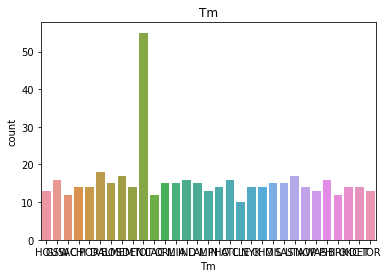

In [10]:
fig, ax = plt.subplots()
sns.countplot(x=data.columns[5], data=data)
plt.title(data.columns[5])

plt.show()

Aquí se ve que los jugadores por equipo están medio bien distribuidos, es decir que estas "clases" están equilibradas, a excepción del equipo "TOT". Habrá que hacer algo con ese equipo para equilibrar esta clase, debido a que utilizar un equipo sí puede ser un buen indicador, ya que pueden haber equipos que pagan mejor que otros.

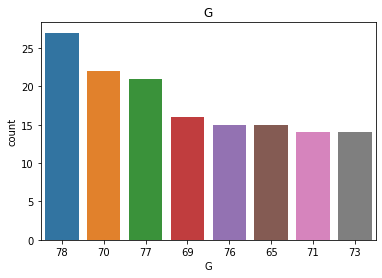

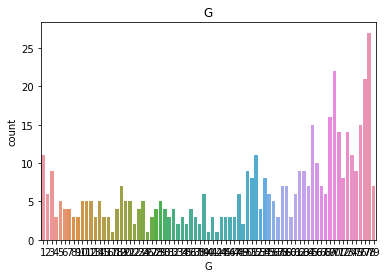

In [11]:
fig, ax = plt.subplots()
sns.countplot(x=data.columns[6], data=data, order=data.G.value_counts().iloc[:8].index)
plt.title(data.columns[6])

plt.show()

sns.countplot(x=data.columns[6], data=data)
plt.title(data.columns[6])
plt.show()

Bueno, con respecto a los partidos jugados se ve que existe un poco de desequilibrio, pero tampoco es muy muy desequilibrado. Esta característica sería buena tenerla en cuenta, puesto que entre más partidos juegue una persona, puede indicar que es más solicitado y/o apreciado y así puede reflejarse en su salario. Además, la cantidad por grupo de jugadores agrupados por juegos  no varía mucho pues el rango va entre [0,30].

Ahora bien, estas son las características que se podían analizar con un gráfico de barras. Con respecto a las otras características se hará más adelante otro tipo de gráficas.

## Distribución del salario por país de procedencia

Text(0.5, 1.0, 'String')

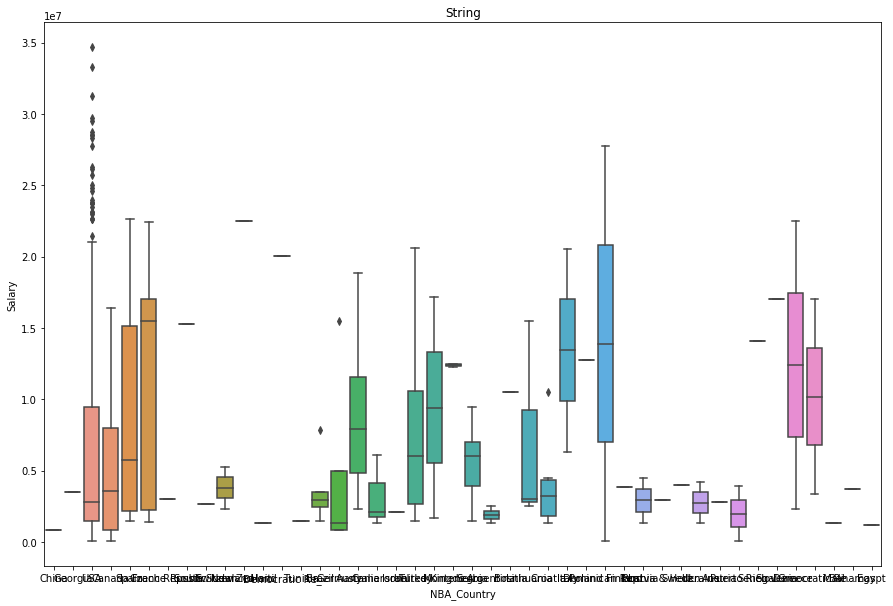

In [12]:
fig = plt.figure(figsize=(15,10))

sns.boxplot(x=data.columns[2], y=data['Salary'], data=data)
plt.title("String")

Text(0.5, 1.0, 'Distribución del salario por país')

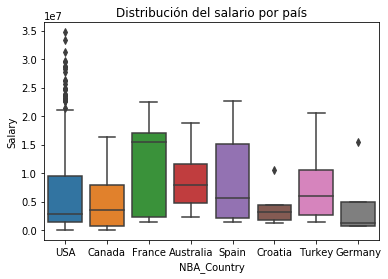

In [13]:
sns.boxplot(x=data.columns[2], y=data['Salary'], data=data, order=data.NBA_Country.value_counts().iloc[:8].index)
plt.title('Distribución del salario por país')

Se puede observar que el salario con respecto al pais de procedencia sí genera diferentes distribuciones y, en general, hay un sesgo positivo en las distribuciones. Sin embargo, se puede notar que hay diferencia en los salarios según el país con respecto al rango. Además, USA tiene muchos datos atípicos

## Distribución del salario por edad

Text(0.5, 1.0, 'Distribución de salarios por edad')

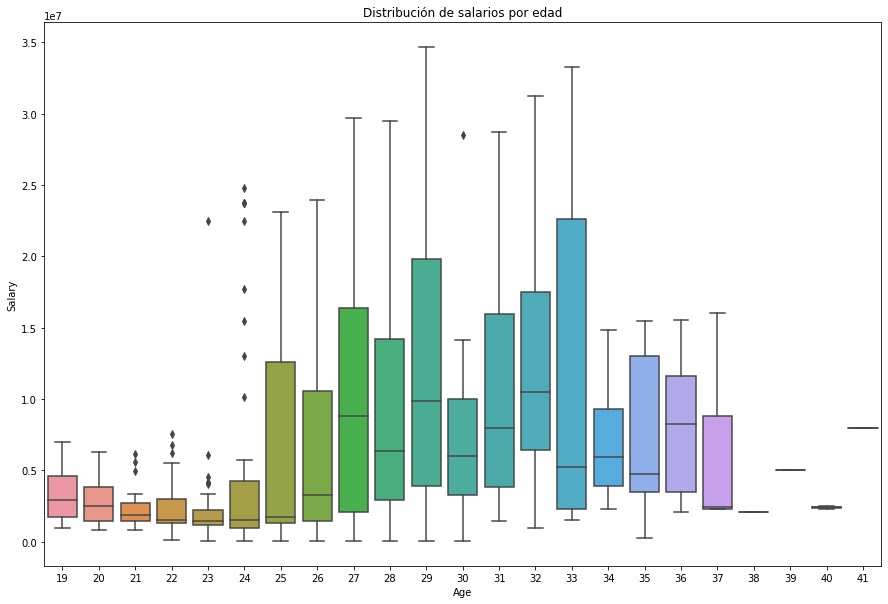

In [14]:
fig = plt.figure(figsize=(15,10))

sns.boxplot(x=data.columns[4] ,y=data['Salary'], data=data)
plt.title('Distribución de salarios por edad')

Aquí podemos ver que de igual manera las distribuciones varían por edad y también resalta una cosa que habíamos dicho anteriormente: entre las edades 20 a 30 años, las cajas son más amplias, lo que sugiere que hay un rango más alto en las distribuciones y esto puede ser causado por el hecho de que es en estas edades donde hay más población

## Distribución salario por equipo

Text(0.5, 1.0, 'Distribución de salarios por team')

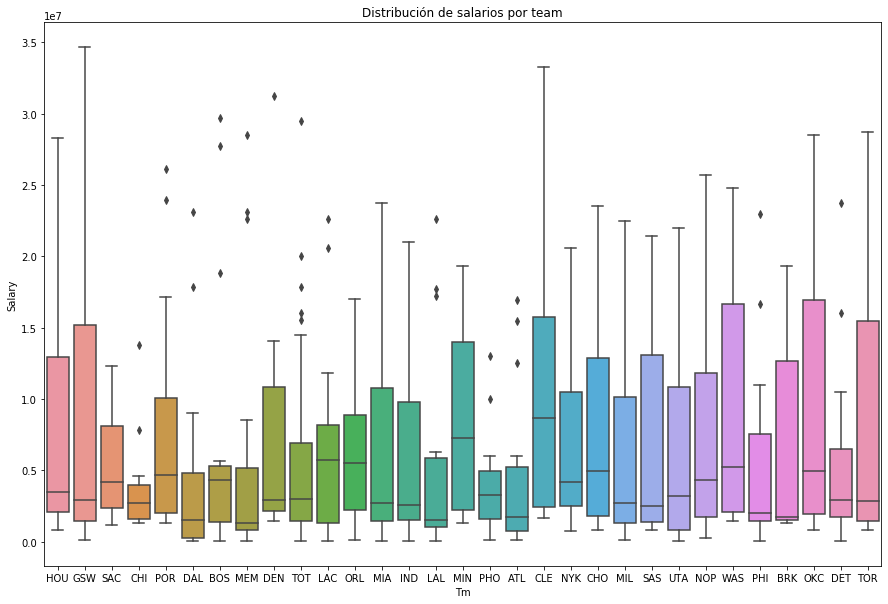

In [15]:
fig = plt.figure(figsize=(15,10))

sns.boxplot(x=data.columns[5], y=data['Salary'], data=data)
plt.title('Distribución de salarios por team')


Con respecto a los equipos y sus salarios, también hay diferentes distribuciones pero estan casi en el mismo rango. Además se nota que algunos equipos tienen más sesgo positivo que otros y precisamente son los que anteriormente vimos que "pagan más"

## Distribución salario por partidos jugados

Text(0.5, 1.0, 'Distribución de salarios por partidos jugados')

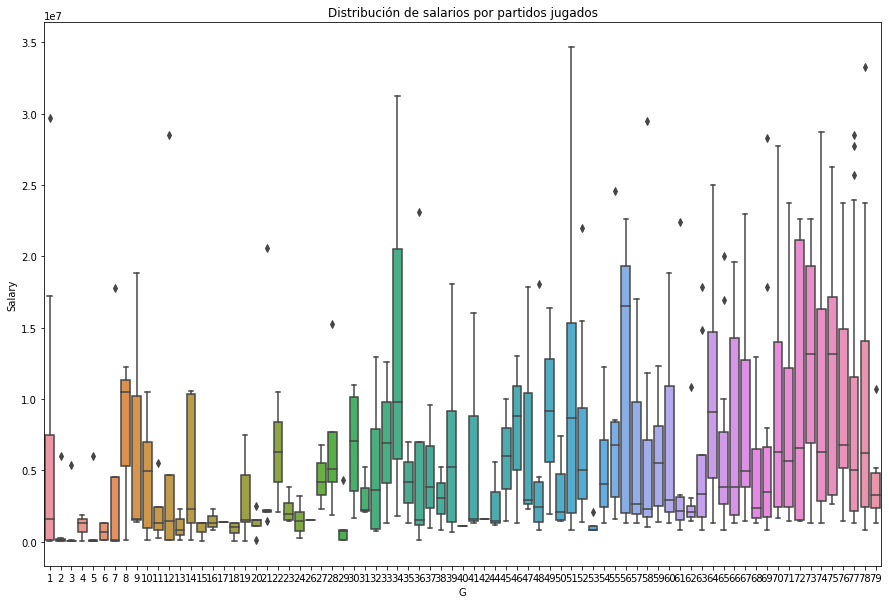

In [16]:
fig = plt.figure(figsize=(15,10))

sns.boxplot(x=data.columns[6], y=data['Salary'], data=data)
plt.title('Distribución de salarios por partidos jugados')

Aquí se puede ver entre más juegos participe un jugador, la distribución es más amplia y, de hecho la mayoría tiene un sesgo positivo. Esto puede sugerir, aunque no es seguro, que entre mayor sea la participación de un jugador, tiene la posibilidad de tener salarios mayores

#### Hay varias cosas para resaltar en general

- En primer lugar, el salario ha dado diferentes distribucion según la característica evaluada. Esto no sugiere una conexión directa, pero sí sugiere que si agrupamos por esas características analizadas, se podrían sacar algunas observaciones

- Hay muchas distribuciones, sin embargo el rango de cada distribución no varía mucho. Esto podría dar indicio de que las variables analizadas anteriormente por sí solas no aportan mucha significancia para estimar el salario, pues habían distribuciones con rangos similares.

Hasta ahora solo hemos visto cómo se comportan algunas variables, pero no hemos tocado todas las características.

# 3. Extracción de intuiciones de los datos (2.0)

In [17]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')


,VORP,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
VORP,1,-0.277281,0.085357,0.402762,0.609402,0.401682,0.263658,-0.0916518,0.0773709,0.0962897,0.287689,0.248133,0.379745,0.163706,0.173972,-0.0150005,0.320084,0.870477,0.754694,0.906013,0.275992,0.384935,0.383073,0.503009,0.57384
NBA_DraftNumber,-0.277281,1,0.00845172,-0.305362,-0.369391,-0.218728,-0.135613,0.1949,0.0500035,-0.0401648,-0.206134,-0.162158,-0.157359,-0.0632782,-0.119901,0.116283,-0.210287,-0.281223,-0.361589,-0.339119,-0.12064,-0.177921,-0.217611,-0.249246,-0.381686
Age,0.085357,0.00845172,1,0.0777008,0.0776208,0.0136223,0.0767532,0.0752434,-0.0428896,-0.0612738,-0.0290688,-0.047113,0.0873542,-0.0535987,-0.0557737,0.0586939,-0.0485727,0.135008,0.0482442,0.113271,0.0314844,0.0675005,-0.0107366,0.0551399,0.336454
G,0.402762,-0.305362,0.0777008,1,0.873426,0.23628,0.294479,-0.0326586,-0.0855559,-0.0722341,0.175356,0.0883374,0.187208,0.0318213,0.0568832,-0.133733,0.0472257,0.499613,0.712907,0.627358,0.193947,0.315606,0.381082,0.440651,0.2977
MP,0.609402,-0.369391,0.0776208,0.873426,1,0.295365,0.263903,0.00242295,-0.0561136,-0.124056,0.130775,0.0338586,0.311496,0.0681418,-0.0163607,-0.127,0.254798,0.658369,0.822075,0.781348,0.191764,0.370325,0.299465,0.454855,0.506961
PER,0.401682,-0.218728,0.0136223,0.23628,0.295365,1,0.778098,-0.146134,0.113893,0.141792,0.234133,0.229064,0.240518,0.0942828,0.247692,-0.138713,0.399755,0.42986,0.343753,0.436058,0.932624,0.9147,0.124678,0.864103,0.269823
TS%,0.263658,-0.135613,0.0767532,0.294479,0.263903,0.778098,1,-0.0858674,0.190253,0.0855553,0.11705,0.123747,0.0631055,-0.0858373,0.177072,0.039675,0.105489,0.350894,0.251406,0.344953,0.77956,0.788039,0.0986266,0.740559,0.174759
3PAr,-0.0916518,0.1949,0.0752434,-0.0326586,0.00242295,-0.146134,-0.0858674,1,-0.247371,-0.577546,-0.411121,-0.551988,-0.0572157,-0.0491538,-0.407826,-0.250295,-0.0818942,-0.107086,-0.140379,-0.129751,-0.00841642,0.149141,-0.338564,-0.0106034,-0.0735023
FTr,0.0773709,0.0500035,-0.0428896,-0.0855559,-0.0561136,0.113893,0.190253,-0.247371,1,0.141799,0.182286,0.192595,-0.00360054,-0.0879889,0.103959,0.184013,0.0112792,0.0795095,0.0132484,0.0627016,0.113674,0.0352901,0.0355919,0.0464988,0.0234945
ORB%,0.0962897,-0.0401648,-0.0612738,-0.0722341,-0.124056,0.141792,0.0855553,-0.577546,0.141799,1,0.482552,0.796903,-0.275163,-0.087354,0.512401,0.140974,0.027711,0.100031,0.0726568,0.0991671,0.035001,-0.103927,0.192293,-0.0111777,0.0042208


#### VORP, MP, OWS, DWS, WS
Estas son las características que tienen más correlación con el salario. Siendo WS la que más relación tiene. Sin embargo, entre ellas mismas tienen también mucha correlación así que si se quiere utilizar estas variables para construir un modelo, lo mejor sería utilizar una de ellas, porque agregar todas sería aumentar la colinealidad.

La correlación es positiva y tiene sentido, puesto que son métricas para medir el performance de un jugador y se esperaría que entre mejor juegue un jugador, mayor retribución económica tendrá.

#### NBA Draft Number
Tiene una correlación negativa con salario y es correlación media. Esto tiene sentido, pues un jugador con menor draft number puede ser interpretado como "más codiciado" y por ende puede que eso significa que le vayan a pagar más. 

Con respecto a la correlación del Draft Number con las variables antes mencionadas, se ve que también es negativa y no es fuerte. Esto tiene sentido por la razón mencionada.


#### Age
La correlación no es fuerte, podría catalogarse como débil con respecto al salario y es positiva. Parece indicar que entre más edad mejor pueden ser los salarios. Tal vez tenga que ver con veteranía o algo relacionado con ello. Aunque de esta característica no nos podemos fiar mucho, porque si vemos la distribución en el gráfico de boxplot, vemos que el rango en las distribuciones "aumenta" pero hasta los 33 años. De ahí, los rangos de distribución disminuyen

#### G
La correlación con el salario es débil, pero positiva. Esto da indicios de que si juegas más partidos durante una temporada, tienes más posibilidades de tener un mejor salario. Y, como vimos anteriormente, el rango en la distribución de salarios entre más partidos juegue un jugador parece aumentar levemente.

La correlación de G con VORP, MP, OW, DWS, WS se puede decir que es moderada, por lo que introducir G podría agregar colinealidad al modelo.

#### USG%
La correlación con el salario es débil, pero la correlación de USG% con las variables anteriormente mencionadas también es débil. Por lo que no agregaría mucha colinealidad al modelo.

La correlación es positiva y tiene sentido de que si un jugador se usa más, tiene más posibilidad de que le paguen más

#### Las otras características
Con respecto a las otras características, la correlación con salarios es muy débil o la correlación con las variables anteriormente mencionadas es moderada. Por lo que no se le darán tanta importancia en esta parte.

#### Salvedad
Se hace la salvedad de que aunque una variable tenga baja correlación con el salario o aporta mucha colinealidad no significa que no sea importante. La importancia y el aporte que le hace al modelo solo se debe dictaminar decisivamente en el entrenamiento del modelo

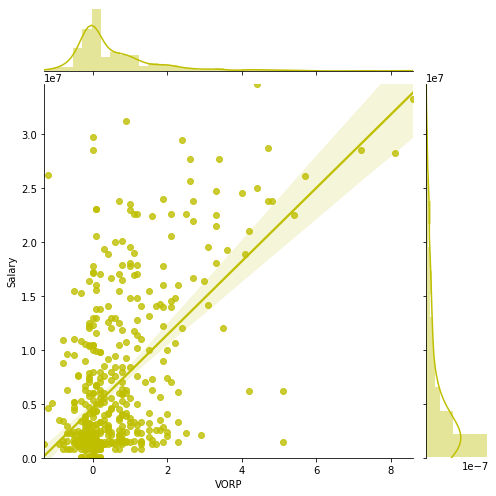

In [18]:
g = sns.jointplot(x=data.columns[1], y=data.columns[27], data=data,
                  kind="reg", truncate=False,
                  xlim=(-1.3, 8.6), ylim=(0, 34682550),
                  color="y", height=7)

Como se mencionó arriba, el VORP es una de las características que tiene mayor correlación con respecto al salario. A pesar de que hay algunos VORP negativos con salarios medianamente altos, los vorp que tienen un salario más alto en el rango de 0 a 1, donde se encuentra la media, por lo que podemos intuir que los registros con los VORP negativo deben tener alguna otra característica por la que su salario es tan alto. Es decir, que un VORP alto no implíca un salario alto, pues hay VORP negativos con un buen salario.

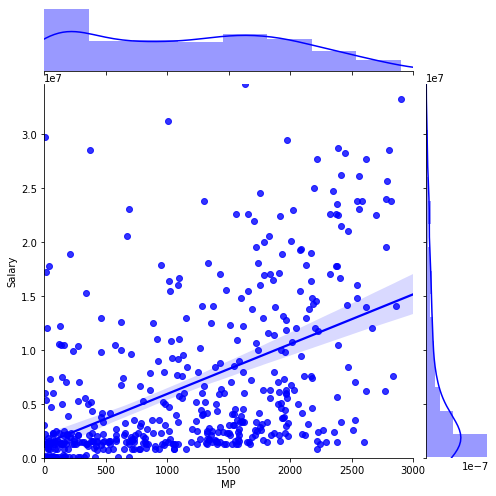

In [19]:
g = sns.jointplot(x=data.columns[7], y=data.columns[27], data=data,
                  kind="reg", truncate=False,
                  xlim=(0, 3000), ylim=(0, 34682550),
                  color="b", height=7)

MP también es una característica que tiene alta correlación con el salario. Como se puede ver, hay jugadores que, a pesar de no jugar ostentan un alto salario, esto puede deberse lesiones o al estado psicologico del jugador, por lo que el entrenador opta por no meterlo en el partido, lo que puede afectar el modelo. También se debe tener en cuenta que son muchos más los suplentes que los jugadores en cancha, por lo que aun así se le debe pagar a estos a pesar de no jugar. Los salarios altos con pocos minutos pueden deberse a casos extraordinarios como LeBron James.

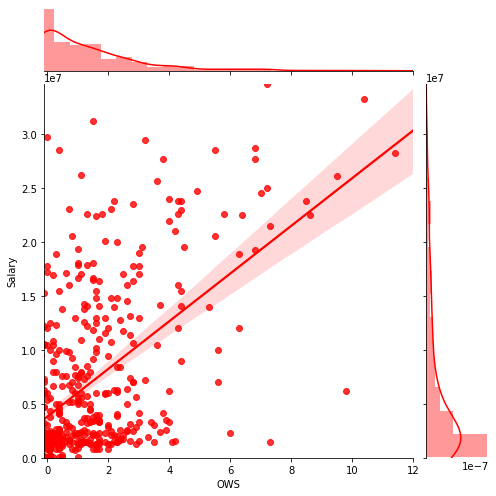

In [20]:
g = sns.jointplot(x=data.columns[20], y=data.columns[27], data=data,
                  kind="reg", truncate=False,
                  xlim=(-0.1, 12), ylim=(0, 34682550),
                  color="r", height=7)

EL OWS también tiene alta correlación con el salario. Esta característica describe unicamente el aporte ofensivo, lo que justifica el alto salario de algunos jugadores que se enfocan más en la defensa. Los registros que tienen un OWS alto pueden considerarse atípicos, pues están considerablemente por encima de la media. Sin embargo, también pueden ser jugadores excepcionales o próximas estrellas (jugadores jovenes) que, aunque son muy buenos, no tienen un alto salario.

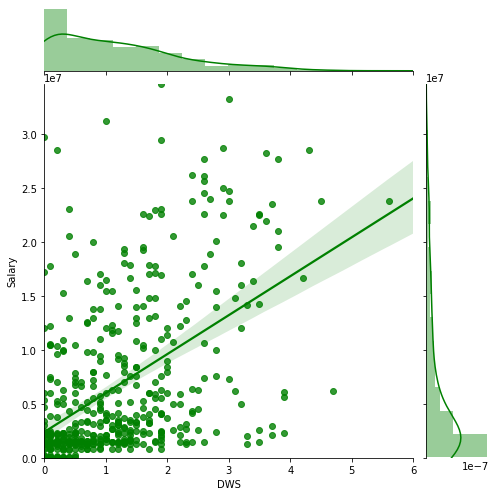

In [21]:
g = sns.jointplot(x=data.columns[21], y=data.columns[27], data=data,
                  kind="reg", truncate=False,
                  xlim=(0, 6), ylim=(0, 34682550),
                  color="g", height=7)

Podemos ver que existe similaridad en la distribución de los datos con la gráfica de OWS, esto nos dá a entender que aunque hay roles definidos en cuanto ataque y defensa, todos los jugadores aportan de ambas maneras al equipo, lo cual explicaría tanto salarios bajos como altos, pues los altos pueden ser jugadores famosos que cobran mucho y los bajos los jugadores promedio. 

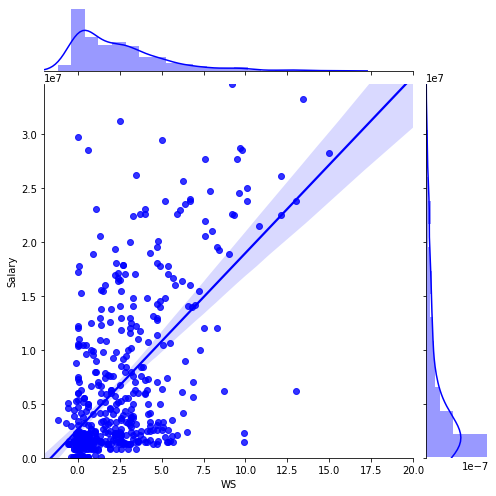

In [22]:
g = sns.jointplot(x=data.columns[22], y=data.columns[27], data=data,
                  kind="reg", truncate=False,
                  xlim=(-2, 20), ylim=(0, 34682550),
                  color="b", height=7)

Una conclusión a primera vista, es que a mayor contribución, mayor salario. Sin embargo, cabe a clarar que el salario alto de algunos jugadores pueda deberse a que es un jugador excepcional, pero que no ha sido la mejor temporada para este. De manera similar sucede con los jugadores prodigio, que aunque no reciben un salario alto, pueden llegar a contribuir en gran medida a las victorias del equipo, lo que explicaría los datos que se encuentran en la part

# LIMPIEZA DE DATOS

Lo primero que haremos es borrar los datos que tengan alguna característica faltante. Por lo visto anteriormente, no son muchos datos que cumplan esta condición, por lo que procederemos a eliminarlos

In [23]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 0 to 484
Data columns (total 28 columns):
Player             483 non-null object
VORP               483 non-null float64
NBA_Country        483 non-null object
NBA_DraftNumber    483 non-null int64
Age                483 non-null int64
Tm                 483 non-null object
G                  483 non-null int64
MP                 483 non-null int64
PER                483 non-null float64
TS%                483 non-null float64
3PAr               483 non-null float64
FTr                483 non-null float64
ORB%               483 non-null float64
DRB%               483 non-null float64
TRB%               483 non-null float64
AST%               483 non-null float64
STL%               483 non-null float64
BLK%               483 non-null float64
TOV%               483 non-null float64
USG%               483 non-null float64
OWS                483 non-null float64
DWS                483 non-null float64
WS                 483 non

Efectivamente solo se borraron 2 entradas. A continuación haremos limpieza de valores atípicos. Para esta labor utilizaremos el método de la desviación estándar y consideraremos que un valor es atípico si está a 3 o más desviaciones estándar.

Se analizara los valores atípicos de las siguientes características: VORP, MP, PER, TS, ORB%, DRB%, TRB%, AST%, STL,% BLK%, TOV%, USG%, FTr, BPM,OBPM, DWS, OWS, Salary. Cabe aclarar que, para cada caso consideraremos si es pertinente eliminar el valor atípico. Primero, miraremos cuáles son los valores atípicos y al finalizar decidiremos qué valores eliminar.

In [24]:
from scipy import stats

### VORP

In [25]:
zVorp = np.abs(stats.zscore(data[['VORP']]))
dataVORP = data[(zVorp >= 3).all(axis=1)]
dataVORP

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
69,Stephen Curry,4.4,USA,7,29,GSW,51,1631,28.2,0.675,0.580,0.350,2.7,14.4,8.9,30.2,2.4,0.4,13.3,31.0,7.2,1.9,9.2,0.270,9.8,-1.2,8.6,34682550.0
88,Russell Westbrook,7.2,USA,4,29,OKC,77,2801,25.0,0.528,0.194,0.339,5.4,25.3,15.0,49.4,2.5,0.6,16.4,34.3,5.5,4.3,9.8,0.168,5.2,3.0,8.2,28530608.0
132,Nikola Jokic,5.1,Serbia,41,22,DEN,71,2288,24.4,0.607,0.279,0.317,9.2,27.7,18.4,29.2,1.8,2.1,15.8,24.1,7.3,2.6,9.9,0.208,4.8,2.1,6.9,1471382.0
193,LeBron James,8.6,USA,1,33,CLE,78,2898,28.5,0.620,0.254,0.330,3.6,22.3,13.1,44.0,1.9,2.1,15.9,31.4,10.4,3.0,13.4,0.222,7.5,2.2,9.7,33285709.0
204,Kyle Lowry,4.7,USA,24,31,TOR,74,2387,19.6,0.600,0.630,0.283,3.1,16.1,9.7,30.4,1.7,0.5,14.5,21.6,6.8,2.9,9.7,0.195,5.5,0.4,5.8,28703704.0
217,Kevin Durant,4.4,USA,2,29,GSW,64,2196,26.2,0.643,0.337,0.331,1.7,19.4,11.2,25.3,1.0,4.2,12.9,30.3,7.2,2.9,10.1,0.221,5.0,0.9,5.9,25000000.0
228,Karl-Anthony Towns,5.1,USA,1,22,MIN,78,2770,24.8,0.645,0.249,0.351,9.3,30.9,20.0,10.7,1.1,3.5,10.8,22.9,9.8,3.1,13.0,0.225,4.3,1.0,5.3,6216840.0
295,James Harden,8.1,USA,3,28,HOU,69,2449,30.2,0.619,0.499,0.498,1.8,15.4,8.6,44.8,2.5,1.7,14.7,36.2,11.4,3.6,15.0,0.294,9.8,1.3,11.1,28299399.0
330,Giannis Antetokounmpo,5.4,Greece,15,23,MIL,73,2698,27.7,0.603,0.099,0.465,6.8,25.1,16.0,23.7,1.9,3.3,11.6,31.3,8.6,3.5,12.1,0.214,4.2,1.8,5.9,22471910.0
411,Damian Lillard,5.7,USA,6,27,POR,70,2558,25.1,0.594,0.444,0.383,2.6,10.9,6.8,30.9,1.5,0.9,11.1,30.4,9.5,2.6,12.1,0.227,7.6,-0.8,6.8,26153057.0


Aqui vemos que efectivamente ese valor de 8.6 era un dato atípico y perteneciente a LeBron. En general, estos jugadores con buen VORP tienen buen salario, a excepcion de Karl-Anthony. Por lo que procederemos a eliminarlo, porque dado su buen VORP, es mal pagado.

In [26]:
data = data.drop(228)

### MP

In [27]:
zMP = np.abs(stats.zscore(data[['MP']]))
dataMP = data[(zMP >= 3).all(axis=1)]
dataMP

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary


Con MP, al parecer no hay datos atípicos estadísticamente hablando

### PER

In [28]:
zPER = np.abs(stats.zscore(data[['PER']]))
dataPER = data[(zPER >= 3).all(axis=1)]
dataPER

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
142,Naz Mitrou-Long,0.0,Canada,62,24,UTA,1,1,134.1,1.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.1,0.1,0.0,0.1,2.713,68.7,-14.3,54.4,92160.0
147,Mindaugas Kuzminskas,0.0,Lithuania,62,28,NYK,1,2,-41.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.6,0.0,0.0,0.0,-1.063,-36.5,-12.7,-49.2,3025035.0
188,Luis Montero,0.0,Dominican Rep...,62,24,DET,2,8,-15.5,0.0,0.0,0.0,0.0,28.2,13.8,0.0,0.0,0.0,66.7,16.6,-0.1,0.0,-0.1,-0.443,-23.8,-2.1,-25.8,50000.0
224,Kay Felder,0.0,USA,54,22,DET,1,3,-31.6,0.0,0.5,0.0,35.9,0.0,18.4,0.0,0.0,0.0,33.3,44.2,-0.1,0.0,-0.1,-1.005,-29.5,-11.9,-41.4,1312611.0


Aquí el jugadro 142 y 147 su salario no es coherente con su PER, por lo que se pasará a eliminarlos

In [29]:
data = data.drop(142)
data = data.drop(147)

### TS%

In [30]:
zTS = np.abs(stats.zscore(data[['TS%']]))
dataTS = data[(zTS >= 3).all(axis=1)]
dataTS

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
6,Xavier Silas,0.0,USA,62,30,BOS,2,7,-4.9,0.000,0.667,0.0,15.9,15.4,15.7,0.0,7.2,0.0,0.0,19.2,-0.1,0.0,0.0,-0.251,-12.6,-0.7,-13.3,74159.0
135,Nicolas Brussino,0.0,Argentina,62,24,ATL,4,10,-4.6,0.000,1.000,0.0,0.0,33.5,16.8,0.0,0.0,0.0,0.0,8.7,0.0,0.0,0.0,-0.180,-13.8,-4.8,-18.6,1312611.0
143,Nate Wolters,-0.1,USA,38,26,UTA,5,19,-2.9,0.167,0.000,0.0,6.1,5.9,6.0,7.1,0.0,0.0,0.0,14.2,-0.1,0.0,-0.1,-0.141,-10.3,-2.2,-12.5,50000.0
188,Luis Montero,0.0,Dominican Rep...,62,24,DET,2,8,-15.5,0.000,0.000,0.0,0.0,28.2,13.8,0.0,0.0,0.0,66.7,16.6,-0.1,0.0,-0.1,-0.443,-23.8,-2.1,-25.8,50000.0
224,Kay Felder,0.0,USA,54,22,DET,1,3,-31.6,0.000,0.500,0.0,35.9,0.0,18.4,0.0,0.0,0.0,33.3,44.2,-0.1,0.0,-0.1,-1.005,-29.5,-11.9,-41.4,1312611.0
241,Josh McRoberts,0.0,USA,37,30,DAL,2,6,-12.5,0.000,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.6,0.0,0.0,0.0,-0.189,-9.8,-2.3,-12.1,6021175.0
274,Jeremy Evans,0.0,USA,55,30,ATL,1,5,10.4,1.000,0.000,0.0,22.4,0.0,11.2,0.0,0.0,0.0,50.0,17.5,0.0,0.0,0.0,-0.030,-2.3,-6.1,-8.3,104059.0
289,Jarell Eddie,0.0,USA,62,26,TOT,3,9,-1.9,0.000,1.000,0.0,0.0,12.0,6.1,0.0,5.6,0.0,0.0,9.8,0.0,0.0,0.0,-0.141,-10.1,1.7,-8.4,83129.0
396,David Stockton,0.0,USA,62,26,UTA,2,6,31.4,0.931,1.000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,35.8,0.1,0.0,0.1,0.464,11.9,-9.4,2.5,148318.0


Aquí hay 9 datos atípicos, sin embargo no se borrará ninguno, porque consideramos que TS puede variar según la posición del jugador o el tiempo jugado de los jugadores. En efecto, la mayoría de los jugadores aquí tienen muy pocos minutos jugados, por lo que este estadístico puede estar influenciado por eso

### ORB%

In [31]:
zORB = np.abs(stats.zscore(data[['ORB%']]))
dataORB = data[(zORB >= 3).all(axis=1)]
dataORB[['Player','MP','ORB%','Salary']]

,Player,MP,ORB%,Salary
19,Vince Hunter,7,32.3,50000.0
224,Kay Felder,3,35.9,1312611.0
239,Josh Smith,12,28.1,5400000.0
262,Joel Bolomboy,38,18.7,1312611.0
274,Jeremy Evans,5,22.4,104059.0
318,Ike Anigbogu,28,20.4,950000.0


De igual manera no los eliminaremos, puesto que ese % alto puede ser por los pocos minutos jugados

### DRB%

In [32]:
zDRB = np.abs(stats.zscore(data[['DRB%']]))
dataDRB = data[(zDRB >= 3).all(axis=1)]
dataDRB[['Player','MP','DRB%','Salary']]

,Player,MP,DRB%,Salary
322,Hassan Whiteside,1303,36.9,23775506.0
390,DeAndre Jordan,2321,37.6,22642350.0
469,Andre Drummond,2541,36.6,23775506.0


Estos datos atípicos parecen consistentes con respecto al salario. Tal vez son muy buenos jugadores defendiendo. No se eliminarán

### TRB%

In [33]:
zTRB = np.abs(stats.zscore(data[['TRB%']]))
dataTRB = data[(zTRB >= 3).all(axis=1)]
dataTRB[['Player','MP','TRB%','Salary']]

,Player,MP,TRB%,Salary
19,Vince Hunter,7,24.8,50000.0
322,Hassan Whiteside,1303,25.6,23775506.0
390,DeAndre Jordan,2321,26.5,22642350.0
469,Andre Drummond,2541,26.3,23775506.0


Misma situación, los jugadores con alto % tienen buen salario, indicativo de que son buenos en eso. El único, Vince Hunter, de igual manera tiene pocos MP, por lo que es fácil que tengo mucho %

### AST%

In [34]:
zAST = np.abs(stats.zscore(data[['AST%']]))
dataAST = data[(zAST >= 3).all(axis=1)]
dataAST

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
88,Russell Westbrook,7.2,USA,4,29,OKC,77,2801,25.0,0.528,0.194,0.339,5.4,25.3,15.0,49.4,2.5,0.6,16.4,34.3,5.5,4.3,9.8,0.168,5.2,3.0,8.2,28530608.0
108,Rajon Rondo,0.2,USA,21,31,NOP,61,1591,14.9,0.519,0.303,0.094,2.0,14.4,8.4,41.6,1.8,0.5,22.6,16.8,1.7,1.5,3.2,0.095,-0.6,-0.9,-1.5,3300000.0
193,LeBron James,8.6,USA,1,33,CLE,78,2898,28.5,0.620,0.254,0.330,3.6,22.3,13.1,44.0,1.9,2.1,15.9,31.4,10.4,3.0,13.4,0.222,7.5,2.2,9.7,33285709.0
257,John Wall,1.0,USA,1,27,WAS,39,1335,18.5,0.507,0.249,0.358,1.9,9.9,5.9,43.6,1.9,2.7,16.6,29.0,1.0,1.3,2.3,0.082,1.2,-0.2,0.9,18063850.0
295,James Harden,8.1,USA,3,28,HOU,69,2449,30.2,0.619,0.499,0.498,1.8,15.4,8.6,44.8,2.5,1.7,14.7,36.2,11.4,3.6,15.0,0.294,9.8,1.3,11.1,28299399.0
309,J.J. Barea,0.9,Puerto Rico,62,33,DAL,69,1603,17.8,0.545,0.454,0.148,1.0,13.3,7.0,45.1,1.1,0.2,16.3,24.9,2.3,1.1,3.3,0.100,2.4,-2.2,0.2,3903900.0
423,Chris Paul,4.0,USA,4,32,HOU,55,1753,24.3,0.601,0.475,0.288,2.3,17.0,9.7,40.7,2.6,0.7,12.7,24.3,7.0,2.6,9.6,0.262,6.0,1.0,7.0,24599495.0


Aquí hay algo curioso, el jugador 108 y 309 tienen buen % de asistencias, pero en el caso del 108 tiene 0.2 de VORP y el 309 tiene 0.9 de VORP. Tal vez el 309, es normal que tenga "poco salario" debido a que es de Puerto Rico y tal vez no paguen las sumas exorbitantes de USA. Investigando un poco, Rajon en esa fecha tuvo algunos problemas por lesiones y comportamiento. Lo que puede explicar el VORP. No se cree necesario eliminarlos.

### STL%

In [35]:
zSTL = np.abs(stats.zscore(data[['STL%']]))
dataSTL = data[(zSTL >= 3).all(axis=1)]
dataSTL

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
6,Xavier Silas,0.0,USA,62,30,BOS,2,7,-4.9,0.000,0.667,0.000,15.9,15.4,15.7,0.0,7.2,0.0,0.0,19.2,-0.1,0.0,0.0,-0.251,-12.6,-0.7,-13.3,74159.0
231,Justin Patton,0.0,USA,16,20,MIN,1,4,19.8,0.500,0.000,0.000,0.0,0.0,0.0,0.0,12.5,0.0,0.0,22.1,0.0,0.0,0.0,0.149,-0.7,4.0,3.2,2247480.0
245,Josh Gray,-0.1,USA,62,24,PHO,5,86,7.3,0.349,0.317,0.268,2.4,10.1,6.2,20.8,4.5,1.9,13.2,26.0,-0.3,0.1,-0.2,-0.118,-5.9,0.4,-5.4,92160.0
289,Jarell Eddie,0.0,USA,62,26,TOT,3,9,-1.9,0.000,1.000,0.000,0.0,12.0,6.1,0.0,5.6,0.0,0.0,9.8,0.0,0.0,0.0,-0.141,-10.1,1.7,-8.4,83129.0
334,Georges Niang,0.0,USA,50,24,UTA,7,18,15.0,0.394,0.375,0.250,12.8,18.8,15.8,26.7,5.6,0.0,18.4,27.3,0.0,0.0,0.0,0.008,-2.0,3.5,1.5,100000.0
439,Brice Johnson,0.0,USA,25,23,TOT,18,98,18.2,0.486,0.024,0.119,10.4,25.4,17.9,3.4,4.5,5.5,10.2,22.3,0.0,0.2,0.2,0.085,-4.9,2.2,-2.7,1331160.0


Aquí, los datos atípicos a pesar de ser atípicos concuerdan con las demas características

### BLK%

In [36]:
zBLK = np.abs(stats.zscore(data[['BLK%']]))
dataBLK = data[(zBLK >= 3).all(axis=1)]
dataBLK

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
0,Zhou Qi,-0.2,China,43,22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,815615.0
19,Vince Hunter,0.0,USA,62,23,MEM,4,7,35.9,0.600,0.000,0.000,32.3,17.0,24.8,0.0,0.0,13.4,16.7,38.5,0.0,0.0,0.0,0.099,-3.1,-5.8,-9.0,50000.0
86,Salah Mejri,1.0,Tunisia,62,31,DAL,61,729,17.8,0.644,0.022,0.482,12.6,25.3,18.8,7.2,1.5,8.2,19.0,12.8,1.3,1.3,2.7,0.177,-2.1,5.4,3.2,1471382.0
189,Lucas Nogueira,0.8,Brazil,16,25,TOR,47,404,17.5,0.661,0.234,0.364,4.8,18.6,11.8,7.0,2.8,8.3,14.4,11.3,0.7,0.9,1.6,0.189,-0.7,6.2,5.5,2947305.0
276,Jeff Withey,-0.1,USA,39,27,DAL,9,39,8.3,0.444,0.625,0.125,2.8,26.4,14.3,0.0,0.0,6.8,10.6,22.0,-0.1,0.1,0.0,-0.053,-9.1,-3.6,-12.7,1577320.0
283,JaVale McGee,0.7,USA,18,30,GSW,62,584,21.8,0.634,0.029,0.233,10.8,18.5,14.9,8.1,1.6,7.6,9.2,18.8,1.5,1.0,2.6,0.212,0.2,2.5,2.7,2116955.0
318,Ike Anigbogu,0.0,USA,47,19,IND,10,28,23.2,0.558,0.000,0.667,20.4,16.1,18.2,0.0,1.8,9.5,14.7,21.8,0.1,0.0,0.1,0.177,-4.1,-1.4,-5.4,950000.0
355,Ekpe Udoh,1.5,USA,6,30,UTA,59,783,15.3,0.566,0.009,0.487,9.4,11.4,10.4,9.1,2.7,7.8,12.5,9.2,1.3,1.7,3.0,0.185,-1.2,6.8,5.6,3200000.0


Tampoco se borrarán estos jugadores

### TOV%

In [37]:
zTOV = np.abs(stats.zscore(data[['TOV%']]))
dataTOV = data[(zTOV >= 3).all(axis=1)]
dataTOV

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
22,Vander Blue,-0.1,USA,62,25,LAL,5,45,-1.8,0.255,0.4,0.400,0.0,2.4,1.2,8.1,1.1,0.0,33.8,8.4,-0.1,0.0,-0.1,-0.103,-8.7,-1.4,-10.1,50000.0
84,Scotty Hopson,0.0,USA,62,28,DAL,1,8,-4.6,0.266,0.0,2.000,0.0,0.0,0.0,15.8,0.0,0.0,34.7,16.4,0.0,0.0,0.0,-0.237,-14.8,-5.9,-20.7,74159.0
185,Luol Deng,0.0,United Kingdo...,7,32,LAL,1,13,5.5,0.500,0.0,0.000,0.0,0.0,0.0,10.1,3.7,0.0,33.3,9.8,0.0,0.0,0.0,-0.019,-7.2,-1.4,-8.6,17190000.0
188,Luis Montero,0.0,Dominican Rep...,62,24,DET,2,8,-15.5,0.000,0.0,0.000,0.0,28.2,13.8,0.0,0.0,0.0,66.7,16.6,-0.1,0.0,-0.1,-0.443,-23.8,-2.1,-25.8,50000.0
224,Kay Felder,0.0,USA,54,22,DET,1,3,-31.6,0.000,0.5,0.000,35.9,0.0,18.4,0.0,0.0,0.0,33.3,44.2,-0.1,0.0,-0.1,-1.005,-29.5,-11.9,-41.4,1312611.0
235,Julyan Stone,0.0,USA,62,29,CHO,20,106,6.7,0.635,1.0,0.286,0.0,24.0,11.7,19.5,0.9,1.6,43.2,5.7,0.0,0.1,0.1,0.059,-3.9,1.1,-2.8,1524305.0
274,Jeremy Evans,0.0,USA,55,30,ATL,1,5,10.4,1.000,0.0,0.000,22.4,0.0,11.2,0.0,0.0,0.0,50.0,17.5,0.0,0.0,0.0,-0.030,-2.3,-6.1,-8.3,104059.0
305,Jacob Pullen,0.0,USA,62,28,PHI,3,6,-2.3,0.500,0.5,0.000,0.0,0.0,0.0,0.0,0.0,0.0,33.3,21.4,0.0,0.0,0.0,-0.211,-10.5,-4.7,-15.3,50000.0
466,Andrew Bogut,0.1,Australia,1,33,LAL,23,216,10.9,0.696,0.0,0.080,12.9,25.5,19.3,9.1,0.9,4.9,42.3,8.8,0.1,0.3,0.4,0.094,-3.6,3.6,0.0,2328652.0


Vemos que aquí tienen salario bajo a excepcion del 185 y 466. El 185 puede explicarse por los pocos MP y el 466 al investigar al parecer ha tenido una carrera dura, pero es bueno

### USG%

In [38]:
zUSG = np.abs(stats.zscore(data[['USG%']]))
dataUSG = data[(zUSG >= 3).all(axis=1)]
dataUSG

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
19,Vince Hunter,0.0,USA,62,23,MEM,4,7,35.9,0.600,0.000,0.000,32.3,17.0,24.8,0.0,0.0,13.4,16.7,38.5,0.0,0.0,0.0,0.099,-3.1,-5.8,-9.0,50000.0
224,Kay Felder,0.0,USA,54,22,DET,1,3,-31.6,0.000,0.500,0.000,35.9,0.0,18.4,0.0,0.0,0.0,33.3,44.2,-0.1,0.0,-0.1,-1.005,-29.5,-11.9,-41.4,1312611.0
295,James Harden,8.1,USA,3,28,HOU,69,2449,30.2,0.619,0.499,0.498,1.8,15.4,8.6,44.8,2.5,1.7,14.7,36.2,11.4,3.6,15.0,0.294,9.8,1.3,11.1,28299399.0
396,David Stockton,0.0,USA,62,26,UTA,2,6,31.4,0.931,1.000,2.000,0.0,0.0,0.0,0.0,0.0,0.0,21.0,35.8,0.1,0.0,0.1,0.464,11.9,-9.4,2.5,148318.0


Datos atípicos pero coherentes

### FTr

In [39]:
zFTr = np.abs(stats.zscore(data[['FTr']]))
dataFTr = data[(zFTr >= 3).all(axis=1)]
dataFTr

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
18,Wade Baldwin,0.0,USA,17,21,POR,4,29,17.0,0.730,0.143,1.286,0.0,18.6,9.4,10.7,0.0,0.0,15.4,19.6,0.1,0.0,0.1,0.177,-0.6,-2.6,-3.1,1874400.0
84,Scotty Hopson,0.0,USA,62,28,DAL,1,8,-4.6,0.266,0.000,2.000,0.0,0.0,0.0,15.8,0.0,0.0,34.7,16.4,0.0,0.0,0.0,-0.237,-14.8,-5.9,-20.7,74159.0
165,Marshall Plumlee,0.0,USA,62,25,MIL,8,52,10.9,0.697,0.000,5.333,9.1,29.3,19.3,4.8,0.0,1.6,23.0,11.4,0.1,0.0,0.2,0.143,-3.7,-2.0,-5.7,100000.0
396,David Stockton,0.0,USA,62,26,UTA,2,6,31.4,0.931,1.000,2.000,0.0,0.0,0.0,0.0,0.0,0.0,21.0,35.8,0.1,0.0,0.1,0.464,11.9,-9.4,2.5,148318.0


Eliminaremos al 165 porque es un dato muy muy atípico

In [40]:
data = data.drop(165)

### BPM

In [41]:
zBPM = np.abs(stats.zscore(data[['BPM']]))
dataBPM = data[(zBPM >= 3).all(axis=1)]
dataBPM

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
84,Scotty Hopson,0.0,USA,62,28,DAL,1,8,-4.6,0.266,0.000,2.0,0.0,0.0,0.0,15.8,0.0,0.0,34.7,16.4,0.0,0.0,0.0,-0.237,-14.8,-5.9,-20.7,74159.0
135,Nicolas Brussino,0.0,Argentina,62,24,ATL,4,10,-4.6,0.000,1.000,0.0,0.0,33.5,16.8,0.0,0.0,0.0,0.0,8.7,0.0,0.0,0.0,-0.180,-13.8,-4.8,-18.6,1312611.0
161,Matt Williams,0.0,USA,62,24,MIA,3,11,-0.7,0.417,0.833,0.0,0.0,10.2,5.1,0.0,0.0,0.0,14.3,28.6,-0.1,0.0,0.0,-0.196,-8.6,-8.6,-17.1,50000.0
188,Luis Montero,0.0,Dominican Rep...,62,24,DET,2,8,-15.5,0.000,0.000,0.0,0.0,28.2,13.8,0.0,0.0,0.0,66.7,16.6,-0.1,0.0,-0.1,-0.443,-23.8,-2.1,-25.8,50000.0
224,Kay Felder,0.0,USA,54,22,DET,1,3,-31.6,0.000,0.500,0.0,35.9,0.0,18.4,0.0,0.0,0.0,33.3,44.2,-0.1,0.0,-0.1,-1.005,-29.5,-11.9,-41.4,1312611.0
375,Derrick Williams,0.0,USA,2,26,LAL,2,9,-3.2,0.250,0.500,0.0,0.0,11.8,5.9,0.0,0.0,0.0,0.0,18.9,0.0,0.0,0.0,-0.192,-11.5,-6.7,-18.2,104059.0


Eliminaremos el 224 por ser un valor atípico muy atípico

In [42]:
data = data.drop(224)

### OBPM

In [43]:
zOBPM = np.abs(stats.zscore(data[['OBPM']]))
dataOBPM = data[(zOBPM>= 3).all(axis=1)]
dataOBPM

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
6,Xavier Silas,0.0,USA,62,30,BOS,2,7,-4.9,0.000,0.667,0.000,15.9,15.4,15.7,0.0,7.2,0.0,0.0,19.2,-0.1,0.0,0.0,-0.251,-12.6,-0.7,-13.3,74159.0
69,Stephen Curry,4.4,USA,7,29,GSW,51,1631,28.2,0.675,0.580,0.350,2.7,14.4,8.9,30.2,2.4,0.4,13.3,31.0,7.2,1.9,9.2,0.270,9.8,-1.2,8.6,34682550.0
84,Scotty Hopson,0.0,USA,62,28,DAL,1,8,-4.6,0.266,0.000,2.000,0.0,0.0,0.0,15.8,0.0,0.0,34.7,16.4,0.0,0.0,0.0,-0.237,-14.8,-5.9,-20.7,74159.0
135,Nicolas Brussino,0.0,Argentina,62,24,ATL,4,10,-4.6,0.000,1.000,0.000,0.0,33.5,16.8,0.0,0.0,0.0,0.0,8.7,0.0,0.0,0.0,-0.180,-13.8,-4.8,-18.6,1312611.0
164,MarShon Brooks,0.2,USA,25,29,MEM,3,76,38.1,0.733,0.405,0.310,4.5,4.7,4.6,32.6,3.3,1.2,7.7,30.6,0.5,0.1,0.6,0.365,13.5,-2.9,10.6,86119.0
188,Luis Montero,0.0,Dominican Rep...,62,24,DET,2,8,-15.5,0.000,0.000,0.000,0.0,28.2,13.8,0.0,0.0,0.0,66.7,16.6,-0.1,0.0,-0.1,-0.443,-23.8,-2.1,-25.8,50000.0
295,James Harden,8.1,USA,3,28,HOU,69,2449,30.2,0.619,0.499,0.498,1.8,15.4,8.6,44.8,2.5,1.7,14.7,36.2,11.4,3.6,15.0,0.294,9.8,1.3,11.1,28299399.0
375,Derrick Williams,0.0,USA,2,26,LAL,2,9,-3.2,0.250,0.500,0.000,0.0,11.8,5.9,0.0,0.0,0.0,0.0,18.9,0.0,0.0,0.0,-0.192,-11.5,-6.7,-18.2,104059.0
396,David Stockton,0.0,USA,62,26,UTA,2,6,31.4,0.931,1.000,2.000,0.0,0.0,0.0,0.0,0.0,0.0,21.0,35.8,0.1,0.0,0.1,0.464,11.9,-9.4,2.5,148318.0


Eliminaremos el 188

In [44]:
data = data.drop(188)

### DWS

In [45]:
zDWS = np.abs(stats.zscore(data[['DWS']]))
dataDWS = data[(zDWS>= 3).all(axis=1)]
dataDWS

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
88,Russell Westbrook,7.2,USA,4,29,OKC,77,2801,25.0,0.528,0.194,0.339,5.4,25.3,15.0,49.4,2.5,0.6,16.4,34.3,5.5,4.3,9.8,0.168,5.2,3.0,8.2,28530608.0
453,Ben Simmons,4.2,Australia,1,21,PHI,77,2614,19.8,0.555,0.012,0.335,5.9,19.3,12.8,37.4,2.4,2.1,19.3,22.2,4.0,4.7,8.7,0.159,0.9,3.5,4.4,6168840.0
462,Anthony Davis,4.7,USA,1,24,NOP,71,2582,28.9,0.615,0.113,0.406,7.8,24.9,16.6,10.8,2.0,5.5,8.7,29.8,8.5,4.5,13.0,0.241,3.0,2.3,5.3,23775506.0
469,Andre Drummond,4.8,USA,9,24,DET,76,2541,23.0,0.556,0.011,0.453,16.5,36.6,26.3,14.3,2.2,4.3,16.0,21.2,4.4,5.6,10.1,0.190,0.2,5.3,5.5,23775506.0


Se eliminará a Ben Simmons, puesto que a pesar de que tiene casi las mismas estadisticas de los demás valores atípicos, su salario es mucho menor

In [46]:
data = data.drop(453)

### OWS

In [47]:
zOWS = np.abs(stats.zscore(data[['OWS']]))
dataOWS = data[(zOWS>= 3).all(axis=1)]
dataOWS

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
69,Stephen Curry,4.4,USA,7,29,GSW,51,1631,28.2,0.675,0.580,0.350,2.7,14.4,8.9,30.2,2.4,0.4,13.3,31.0,7.2,1.9,9.2,0.270,9.8,-1.2,8.6,34682550.0
132,Nikola Jokic,5.1,Serbia,41,22,DEN,71,2288,24.4,0.607,0.279,0.317,9.2,27.7,18.4,29.2,1.8,2.1,15.8,24.1,7.3,2.6,9.9,0.208,4.8,2.1,6.9,1471382.0
193,LeBron James,8.6,USA,1,33,CLE,78,2898,28.5,0.620,0.254,0.330,3.6,22.3,13.1,44.0,1.9,2.1,15.9,31.4,10.4,3.0,13.4,0.222,7.5,2.2,9.7,33285709.0
200,LaMarcus Aldridge,3.3,USA,2,32,SAS,72,2416,25.2,0.573,0.070,0.303,10.8,17.1,14.0,11.5,0.8,3.0,6.9,29.1,7.3,3.4,10.8,0.214,3.1,0.3,3.4,21461010.0
217,Kevin Durant,4.4,USA,2,29,GSW,64,2196,26.2,0.643,0.337,0.331,1.7,19.4,11.2,25.3,1.0,4.2,12.9,30.3,7.2,2.9,10.1,0.221,5.0,0.9,5.9,25000000.0
295,James Harden,8.1,USA,3,28,HOU,69,2449,30.2,0.619,0.499,0.498,1.8,15.4,8.6,44.8,2.5,1.7,14.7,36.2,11.4,3.6,15.0,0.294,9.8,1.3,11.1,28299399.0
330,Giannis Antetokounmpo,5.4,Greece,15,23,MIL,73,2698,27.7,0.603,0.099,0.465,6.8,25.1,16.0,23.7,1.9,3.3,11.6,31.3,8.6,3.5,12.1,0.214,4.2,1.8,5.9,22471910.0
411,Damian Lillard,5.7,USA,6,27,POR,70,2558,25.1,0.594,0.444,0.383,2.6,10.9,6.8,30.9,1.5,0.9,11.1,30.4,9.5,2.6,12.1,0.227,7.6,-0.8,6.8,26153057.0
423,Chris Paul,4.0,USA,4,32,HOU,55,1753,24.3,0.601,0.475,0.288,2.3,17.0,9.7,40.7,2.6,0.7,12.7,24.3,7.0,2.6,9.6,0.262,6.0,1.0,7.0,24599495.0
462,Anthony Davis,4.7,USA,1,24,NOP,71,2582,28.9,0.615,0.113,0.406,7.8,24.9,16.6,10.8,2.0,5.5,8.7,29.8,8.5,4.5,13.0,0.241,3.0,2.3,5.3,23775506.0


Se eliminara al 132, por la misma razón anterior. Además tanto como el anterior eliminado como este, actualmente tienen un salario similar a los demás jugadores (20 millones o más)

In [48]:
data = data.drop(132)

### Salary

In [49]:
zSalary = np.abs(stats.zscore(data[['Salary']]))
dataSalary = data[(zSalary>= 3).all(axis=1)]
dataSalary

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
69,Stephen Curry,4.4,USA,7,29,GSW,51,1631,28.2,0.675,0.580,0.350,2.7,14.4,8.9,30.2,2.4,0.4,13.3,31.0,7.2,1.9,9.2,0.270,9.8,-1.2,8.6,34682550.0
113,Paul Millsap,0.9,USA,47,32,DEN,34,1008,18.2,0.564,0.258,0.360,6.3,18.3,12.3,14.6,1.9,3.3,12.9,22.4,1.5,1.0,2.5,0.120,0.6,0.8,1.4,31269231.0
193,LeBron James,8.6,USA,1,33,CLE,78,2898,28.5,0.620,0.254,0.330,3.6,22.3,13.1,44.0,1.9,2.1,15.9,31.4,10.4,3.0,13.4,0.222,7.5,2.2,9.7,33285709.0
327,Gordon Hayward,0.0,USA,9,27,BOS,1,5,7.4,0.500,0.500,0.000,0.0,21.6,11.0,0.0,0.0,0.0,0.0,17.9,0.0,0.0,0.0,0.057,-5.9,-6.0,-11.9,29727900.0
451,Blake Griffin,2.4,USA,1,28,TOT,58,1970,19.6,0.544,0.323,0.331,4.1,19.8,11.9,28.1,1.0,0.8,12.6,28.9,3.2,1.9,5.0,0.123,2.8,0.0,2.8,29512900.0


Con respecto al salario, no se eliminará ningún jugador, solo se muestra aquí a manera de ejercicio, pero tampoco vale desprovisionar el modelo acerca de jugadores estrellas con sueldos extraordinarios

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 484
Data columns (total 28 columns):
Player             475 non-null object
VORP               475 non-null float64
NBA_Country        475 non-null object
NBA_DraftNumber    475 non-null int64
Age                475 non-null int64
Tm                 475 non-null object
G                  475 non-null int64
MP                 475 non-null int64
PER                475 non-null float64
TS%                475 non-null float64
3PAr               475 non-null float64
FTr                475 non-null float64
ORB%               475 non-null float64
DRB%               475 non-null float64
TRB%               475 non-null float64
AST%               475 non-null float64
STL%               475 non-null float64
BLK%               475 non-null float64
TOV%               475 non-null float64
USG%               475 non-null float64
OWS                475 non-null float64
DWS                475 non-null float64
WS                 475 non

En total, se eliminaron 10 entradas. No se eliminaron todos los datos atípicos porque siendo así la cantidad de datapoints disminuiría considerablemente. Además, se eliminaban datos si estos no tenían coherencia o eran muy muy atípicos.